A churn model is a mathematical representation of how churn impacts our business. Churn calculations are built on existing data (the number of customers who left your service during a given time period). A predictive churn model extrapolates on the data to show future potential churn rates

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [74]:
churn_df=pd.read_csv("Churn_Modelling.csv")

In [75]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [76]:
churn_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [80]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [81]:
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [77]:
# 1) RowNumber : Serial number
# 2) CustomerId : Unique Ids for bank customer identification
# 3) Surname : Customer's last name
# 4) CreditScore : Credit score of the customer
# 5) Geography : The country from which the customer belongs
# 6) Gender : Male or Female
# 7) Age : The age of the customer
# 8) Tenure : Number of years for which the customer has been with the bank
# 9) Balance : Bank balance of the customer
# 10) NumOfProducts : Number of bank products the customer is utilising
# 11) HasCrCard : Binary Flag for whether the customer holds a credit card with the bank or not
# 12) IsActiveMember : Binary Flag for whether the customer is an active member with the bank or not
# 13) EstimatedSalary : Estimated salary of the customer 
# 14) Exited : Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.


## 1. Number of customers in each country

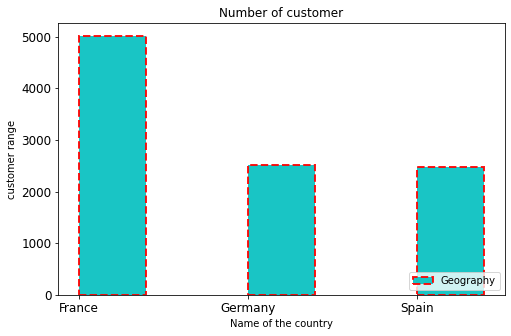

In [82]:
plt.figure(figsize=(8,5)) # Figure object with a specific size
style.use('grayscale')
plt.bar(x=churn_df['Geography'].value_counts().index,height=churn_df.Geography.value_counts().values, 
        width = 0.4, align = "edge", color = "c",
       edgecolor = "r", linewidth = 2, alpha = 0.9, linestyle = "--",
       label ="Geography")
plt.title("Number of customer")
plt.xlabel("Name of the country")
plt.ylabel("customer range")
plt.legend(loc=4)
plt.show()

 simple histogram

(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <BarContainer object of 10 artists>)

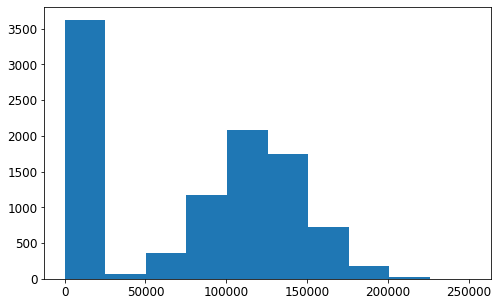

In [40]:
plt.hist(x=churn_df['Balance'])

 histogram

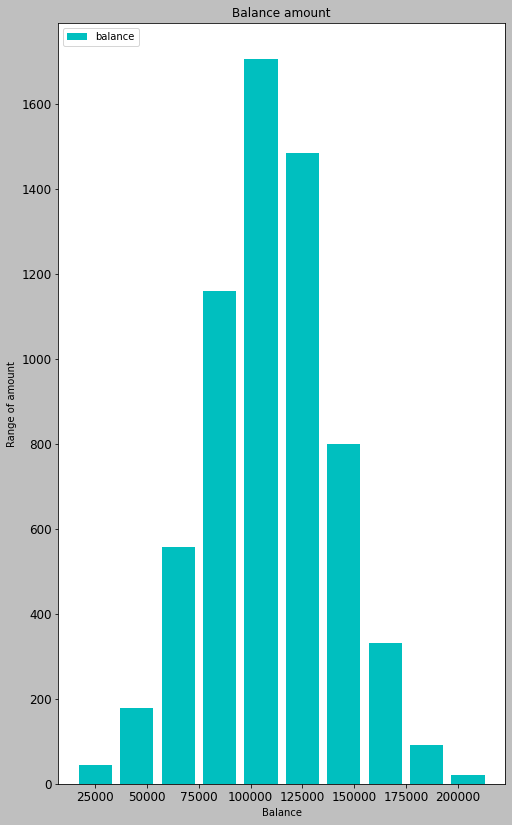

In [91]:
plt.figure(figsize=(8,14))
plt.hist(churn_df['Balance'], bins=None, histtype='bar',align="left",orientation="vertical",rwidth=0.8,
         color='c',label="balance",range=(25000, 225000))
plt.title("Distribution on Balance (25000 - 225000)", fontsize=14)
plt.title('Balance amount')
plt.xlabel('Balance')
plt.ylabel('Range of amount')
plt.legend(loc=2)
plt.show()

## 6. Creating a simple scatter plot

 Scatter plots are commonly used to map the relationship between numerical variables. 
We can visualize the correlation between variables using a scatter plot.there is not a correlation between the age and credit score.

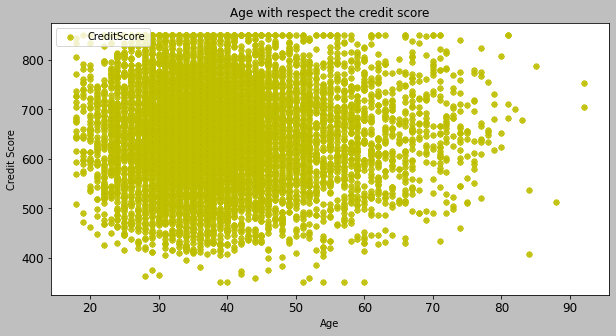

In [97]:
plt.figure(figsize=(10,5))
plt.scatter(churn_df['Age'],churn_df['CreditScore'],s=2,c='k',marker="*",alpha=0.9,linewidths=5,
            edgecolors='y',label="CreditScore")
plt.title("Age with respect the credit score")
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.legend(loc=2)
plt.show()


## 7. Scatter plots with subplots

In [62]:
#ax = plt.subplots()

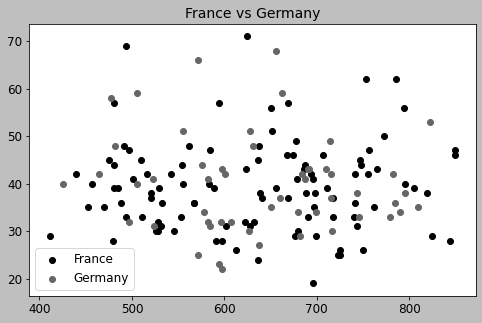

In [106]:
plt.title("France vs Germany", fontsize=14)
plt.scatter(x=sample[sample.Geography == 'France']['CreditScore'], y=sample[sample.Geography == 'France']['Age'])
plt.scatter(x=sample[sample.Geography == 'Germany']['CreditScore'], y=sample[sample.Geography == 'Germany']['Age'])
plt.legend(labels=['France','Germany'], loc='lower left', fontsize=12)

## 8. Grid of subplots

In [61]:
#(ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

## 9. Rearranging and accessing the subplots

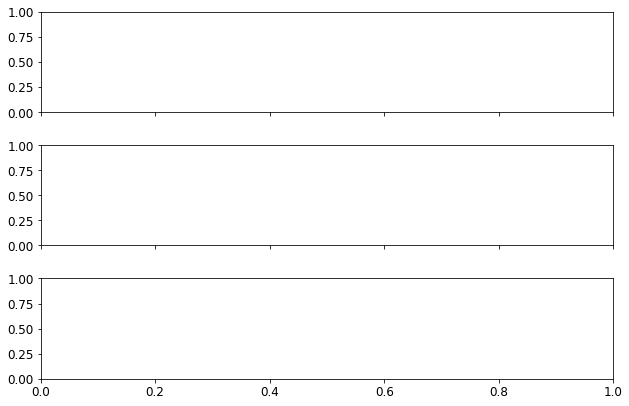

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(9,6), sharex=True)
fig.tight_layout(pad=2)

Text(0.5, 1.0, 'Number of Products')

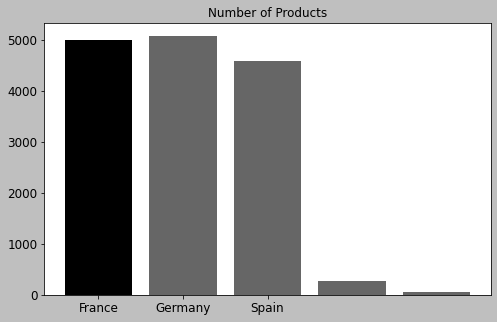

In [105]:

plt.figure(figsize=(8,5))
countries = churn_df.Geography.value_counts()
products = churn_df.NumOfProducts.value_counts()
plt.bar(x=countries.index, height=countries.values)
plt.title("Countries", fontsize=12)
plt.bar(x=products.index, height=products.values)
plt.title("Number of Products", fontsize=12)

(array([[  0.,   3.,   4.,   5.,   5.,   2.,   0.,   0.,   0.,   0.],
        [  7.,  29.,  66.,  26.,  18.,  14.,   4.,   1.,   1.,   0.],
        [ 30., 100., 176.,  68.,  39.,  23.,   7.,   4.,   0.,   0.],
        [ 65., 210., 331., 188.,  76.,  48.,  27.,  11.,   1.,   1.],
        [ 82., 324., 521., 275., 124.,  78.,  27.,  13.,   0.,   0.],
        [107., 395., 659., 366., 175.,  98.,  34.,  28.,   4.,   0.],
        [120., 431., 713., 366., 142.,  99.,  48.,  27.,   6.,   0.],
        [111., 312., 558., 295., 127.,  72.,  30.,  15.,   4.,   1.],
        [ 55., 221., 357., 168.,  77.,  51.,  18.,  18.,   1.,   2.],
        [ 34., 154., 244., 114.,  45.,  38.,  13.,  10.,   3.,   0.]]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <matplotlib.collections.QuadMesh at 0x18090f2c730>)

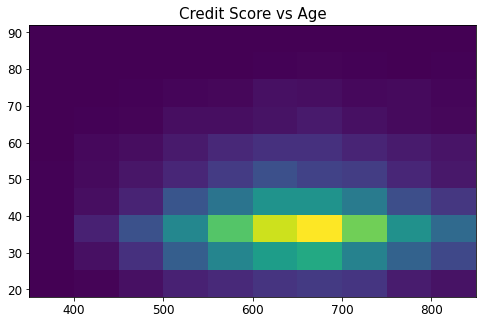

In [58]:
plt.title("Credit Score vs Age", fontsize=15)
plt.hist2d(x=churn_df.CreditScore, y=churn_df.Age)

In [60]:
#The most populated group consists of the customers between ages 30 and 40 and 
#have credit scores between 600 and 700.